In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from textwrap import wrap

In [2]:
titlefont = {'color':  'dimgrey',
        'weight': 'bold',
        'size': 20}
font1 = {'color':  'darkgray',
        'weight': 'bold',
        'size': 15}
font2 = {'color':  'grey',
        'weight': 'bold',
        'size': 15}
highlight = {'color': '#e78ac3',
        'weight': 'bold',
        'size': 15}

pos_labels = ['Very positive', 'Positive', 'Neutral', 'Negative', 'Very negative']
agr_labels = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
regulationlabels=['Unregulated','Slightly regulated', 'Moderately regulated','Quite regulated','Heavily regulated']
Ethnicitylabels = ('Arab','Mixed','Asian','Black','White')

In [3]:
df = pd.read_excel('./poAI.xlsx', usecols=[*range(1,24)])
df.columns = ['Age', 'Gender', 'Ethnicity','Sector','Experience','Household income','Previous AI knowledge','Represents AI','Advancement view','Influenced view','Comfortable with AI','Comfortable type AI','Surpass human intellect','Regulation',
             'Replace job','Trust tech ethical','Tech safe','Tech privacy','Privacy','Moral','AI discriminate','AI trustworthy news','Positive impact outweighs negative']

df = df.astype('category')
df['Influenced view']= df['Influenced view'].astype(pd.CategoricalDtype(categories=['Science Fiction (movies, books, comics, tv shows)','Social media', 'News websites like BBC, Sky, CNET', 'Tech websites like TechCrunch, TheNextWeb, Gizmodo','Scientific reports','Other'],ordered=True))
df.head(5)

,Age,Gender,Ethnicity,Sector,Experience,Household income,Previous AI knowledge,Represents AI,Advancement view,Influenced view,...,Regulation,Replace job,Trust tech ethical,Tech safe,Tech privacy,Privacy,Moral,AI discriminate,AI trustworthy news,Positive impact outweighs negative
0,19-24,Female,Arab,I do not work,I do not work,"Under £17,999",Yes,Humanoid robots,2,"Science Fiction (movies, books, comics, tv shows)",...,4,I do not work,2,2,4,4,5,4,2,4
1,19-24,Female,White,Hospitality and events management,Entry-level,"Under £17,999",Yes,Humanoid robots,4,"Science Fiction (movies, books, comics, tv shows)",...,5,Yes,4,4,5,5,5,3,3,4
2,19-24,Female,Black,I do not work,I do not work,"£24,000 to £35,999",No,Humanoid robots,4,"Science Fiction (movies, books, comics, tv shows)",...,5,No,5,4,5,5,5,5,5,5
3,19-24,Female,White,I do not work,I do not work,"£36,000 to £49,999",Yes,"Apps like Uber, Google maps, Social media apps...",2,Scientific reports,...,4,I do not work,4,3,3,2,4,4,3,3
4,19-24,Female,Black,Healthcare,Entry-level,"Under £17,999",No,"Apps like Uber, Google maps, Social media apps...",3,"News websites like BBC, Sky, CNET",...,5,Yes,3,3,3,3,4,3,3,3


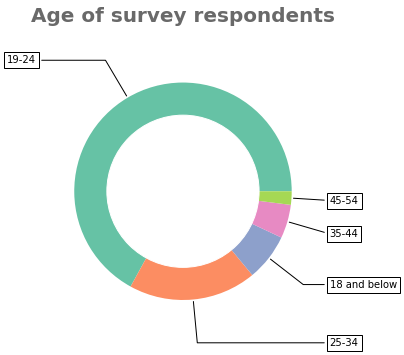

In [4]:
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

age = df['Age'].value_counts()
agelabels = ['19-24','25-34','18 and below','35-44','45-54']

colors5 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']

wedges, texts = ax.pie(age , colors=colors5, wedgeprops=dict(width=0.5))

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)



bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(agelabels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


plt.title('Age of survey respondents', y = 1.1,fontdict=titlefont)
#plt.savefig('age.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

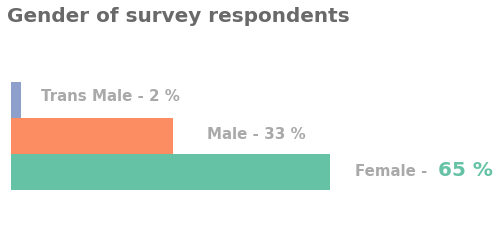

In [5]:
fig = plt.figure(figsize=(8,6))

colors3 = ['#66c2a5','#fc8d62','#8da0cb']

ax= df['Gender'].value_counts().to_frame().T.plot.barh(color=colors3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

ax.legend(bbox_to_anchor=(1.5,0.8))

ax.text(6,0.165,'Trans Male - 2 %', fontdict=font1) 
ax.text(40,-0.01,'Male - 33 %', fontdict=font1)

ax.text(70,-0.18,'Female -', fontdict=font1)
ax.text(87,-0.18,'65 %', fontdict=titlefont, color='#66c2a5')

ax.get_legend().remove()

ax.set_title('Gender of survey respondents', fontdict=titlefont)
#plt.savefig('gender.png', dpi=300, bbox_inches='tight')
plt.show()


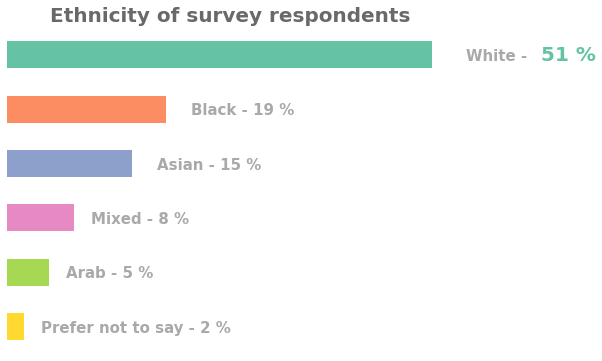

In [6]:
fig = plt.figure(figsize=(8,6))

colors6 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

ax = df['Ethnicity'].value_counts().plot.barh(color=colors6)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax.text(55,0.1,'White -', fontdict=font1)
ax.text(64,0.1,'51 %', fontdict=titlefont, color='#66c2a5')

ax.text(22,1.1,'Black - 19 %', fontdict=font1)
ax.text(18,2.1,'Asian - 15 %', fontdict=font1)
ax.text(10,3.1,'Mixed - 8 %', fontdict=font1)
ax.text(7,4.1,'Arab - 5 %', fontdict=font1)
ax.text(4,5.1,'Prefer not to say - 2 %', fontdict=font1)


ax.set_title('Ethnicity of survey respondents', fontdict=titlefont)
#plt.savefig('ethnicity.png', dpi=300, bbox_inches='tight')
plt.show()

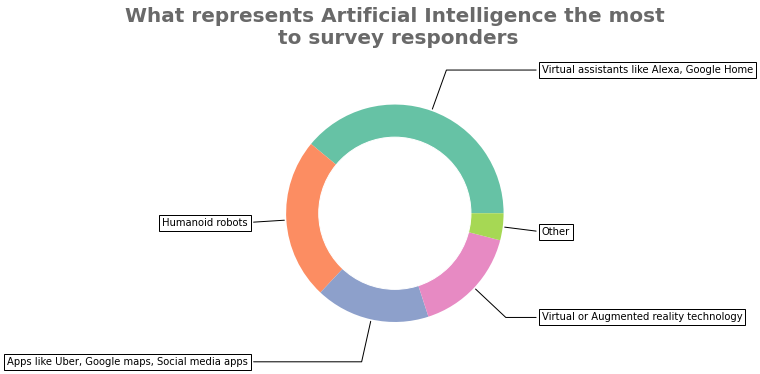

In [7]:
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

represent = df['Represents AI'].value_counts()
representlabels =  ['Virtual assistants like Alexa, Google Home','Humanoid robots','Apps like Uber, Google maps, Social media apps','Virtual or Augmented reality technology','Other']

colors5 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']

wedges, texts = ax.pie(represent , colors=colors5, wedgeprops=dict(width=0.5))

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)



bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(representlabels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


plt.title('What represents Artificial Intelligence the most\n to survey responders', y = 1.1,fontdict=titlefont)
#plt.savefig('represent.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

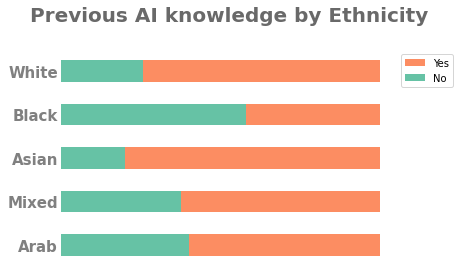

In [8]:
# Do you have some knowledge of artificial intelligence technology?

df['Ethnicity'] = df['Ethnicity'].astype(pd.CategoricalDtype(categories=['Arab','Mixed','Asian','Black','White'],ordered=False))

fig = plt.figure(figsize=(8,6))
yesno = ['No', 'Yes']


table = pd.crosstab(df['Ethnicity'],df['Previous AI knowledge'], normalize='index')*100
ax = table.plot.barh(stacked=True, color=colors5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

#move box with labels to outside of graph and use new labels declared above
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(yesno),bbox_to_anchor=(1.0,1.0))

ax.set_ylabel('')
ax.set_title('Previous AI knowledge by Ethnicity', y=1.1,fontdict=titlefont)
plt.xticks(rotation=360)
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
#plt.savefig('prevK.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 576x432 with 0 Axes>

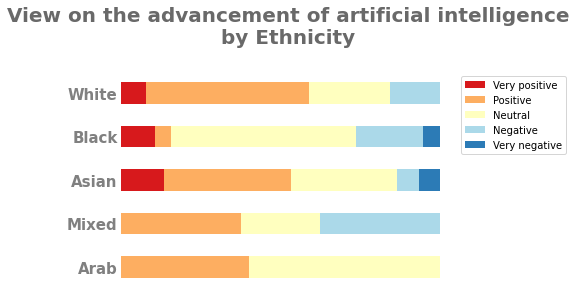

In [9]:
# What is your view on the advancement of artificial intelligence technology?

fig = plt.figure(figsize=(8,6))

dcolors = ['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']

table2 = pd.crosstab(df['Ethnicity'],df['Advancement view'], normalize='index')*100
ax = table2.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, pos_labels,bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('View on the advancement of artificial intelligence\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('advancement.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

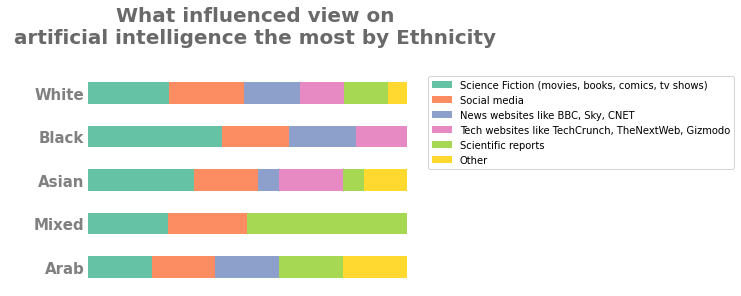

In [42]:
# "What influenced your view on artificial intelligence the most?":"Influenced view"
fig = plt.figure(figsize=(8,6))

tableI = pd.crosstab(df['Ethnicity'],df['Influenced view'], normalize='index')*100
ax = tableI.plot.barh(stacked=True, color=colors6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

#handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('What influenced view on\n artificial intelligence the most by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('influence.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 720x576 with 0 Axes>

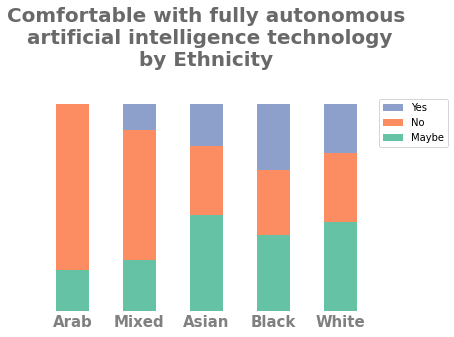

In [32]:
# In the near future would you be comfortable with fully autonomous artificial intelligence technology?

fig = plt.figure(figsize=(10,8))
ynm = ['Maybe', 'No','Yes']

table3 = pd.crosstab(df['Ethnicity'],df['Comfortable with AI'], normalize='index')*100

ax = table3.plot.bar(stacked=True, color=colors5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(ynm), bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_xlabel('')
plt.xticks(fontsize=15)
ax.set_xticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Comfortable with fully autonomous\n artificial intelligence technology\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('comfortable.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

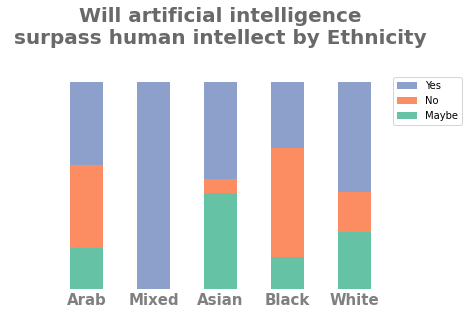

In [25]:
# Do you think that artificial intelligence will surpass human intellect?

fig = plt.figure(figsize=(8,6))

table4 = pd.crosstab(df['Ethnicity'],df['Surpass human intellect'], normalize='index')*100
ax = table4.plot.bar(stacked=True,color=colors5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(ynm), bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_xlabel('')
plt.xticks(fontsize=15)
ax.set_xticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Will artificial intelligence\n surpass human intellect by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('surpassI.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

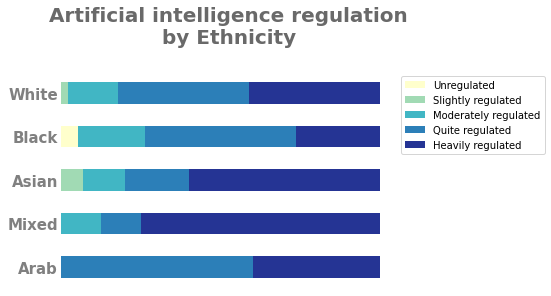

In [13]:
# "Should advancing artificial intelligence technology be regulated?":"Regulation"

fig = plt.figure(figsize=(8,6))

scolors = ['#ffffcc','#a1dab4','#41b6c4','#2c7fb8','#253494']

table5 = pd.crosstab(df['Ethnicity'],df['Regulation'], normalize='index')*100
ax = table5.plot.barh(stacked=True, color=scolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, regulationlabels,bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Artificial intelligence regulation\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('regulation.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

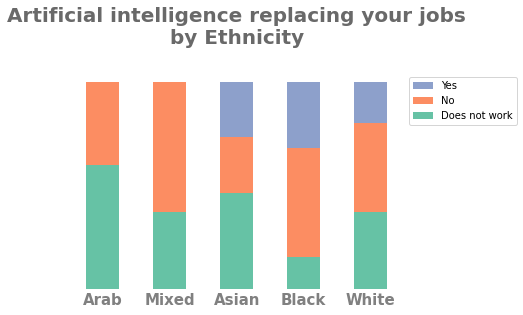

In [14]:
# "Do you think artificial intelligence would be able to replace you at your current job?":"Replace job"

fig = plt.figure(figsize=(8,6))

ynw = ['Does not work', 'No', 'Yes']

table6 = pd.crosstab(df['Ethnicity'],df['Replace job'], normalize='index')*100
ax = table6.plot.bar(stacked=True,color=colors5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_yaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(ynw), bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_xlabel('')
plt.xticks(fontsize=15)
ax.set_xticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Artificial intelligence replacing your jobs\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('replaceJob.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

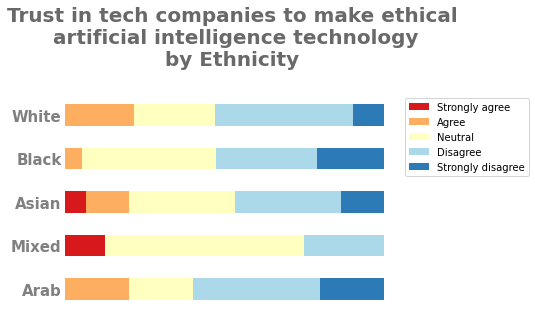

In [33]:
# "Tech companies can be trusted to make ethical artificial intelligence technology":"Trust tech ethical"

fig = plt.figure(figsize=(8,6))

table7 = pd.crosstab(df['Ethnicity'],df['Trust tech ethical'], normalize='index')*100
ax = table7.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Trust in tech companies to make ethical\n artificial intelligence technology\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('ethical.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

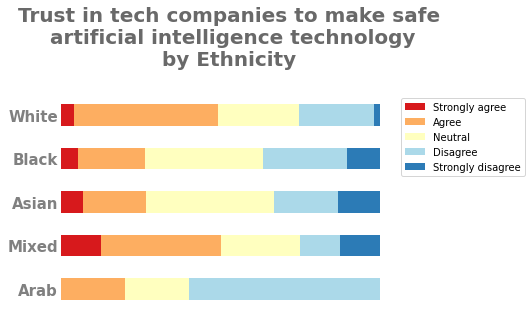

In [44]:
# "Tech companies are competent in creating safe artificial intelligence technology for the public":"Tech safe"

fig = plt.figure(figsize=(8,6))

table8 = pd.crosstab(df['Ethnicity'],df['Tech safe'], normalize='index')*100
ax = table8.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Trust in tech companies to make safe\n artificial intelligence technology\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('safe.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

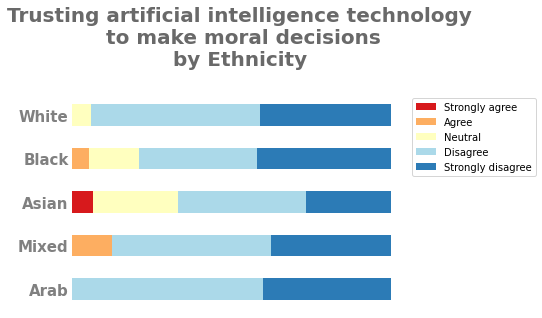

In [43]:
# "I would trust artificial intelligence technology to make moral decision for me":"Moral"
fig = plt.figure(figsize=(8,6))

table9 = pd.crosstab(df['Ethnicity'],df['Moral'], normalize='index')*100
ax = table9.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Trusting artificial intelligence technology\n to make moral decisions\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('moral.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

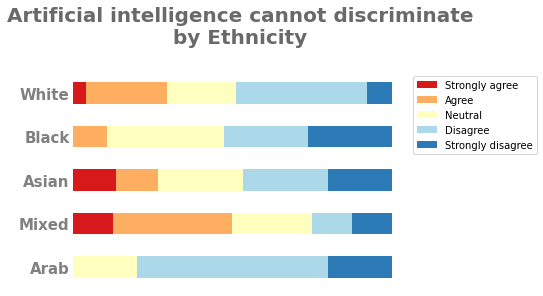

In [18]:
# "I believe artificial intelligence cannot discriminate":"AI cannot discriminate"

fig = plt.figure(figsize=(8,6))

table10 = pd.crosstab(df['Ethnicity'],df['AI discriminate'], normalize='index')*100
ax = table10.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('Artificial intelligence cannot discriminate\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('discriminate.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 576x432 with 0 Axes>

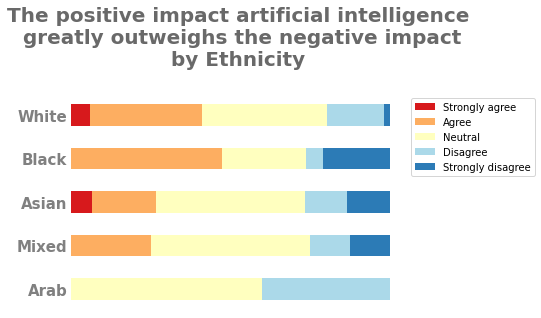

In [19]:
# "The positive impact of the advancement of artificial intelligence greatly outweighs the negative impact":"Positive impact outweighs negative"
fig = plt.figure(figsize=(8,6))

table11 = pd.crosstab(df['Ethnicity'],df['Positive impact outweighs negative'], normalize='index')*100
ax = table11.plot.barh(stacked=True, color=dcolors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axes.get_xaxis().set_ticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, agr_labels,bbox_to_anchor=(1.0,1.0))

plt.xticks(rotation=360)

ax.set_ylabel('')
plt.yticks(fontsize=15)
ax.set_yticklabels(Ethnicitylabels,fontdict=font2)
ax.set_title('The positive impact artificial intelligence\n greatly outweighs the negative impact\n by Ethnicity ', y=1.1,fontdict=titlefont)
#plt.savefig('posNeg.png', dpi=300, bbox_inches='tight')
plt.show()